In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import os

plots_dir = "app/static/plots"
os.makedirs(plots_dir, exist_ok=True)

df = pd.read_csv("data/processed/clean_churn.csv")

if df['Churn'].dtype == 'object':
    df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})


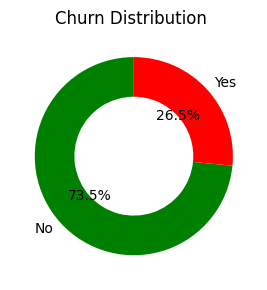

In [43]:
churn_counts = df['Churn'].value_counts().sort_index()

colors = ['green', 'red']  
labels = ['No', 'Yes']

plt.figure(figsize=(3,3))
plt.pie(
    churn_counts, 
    labels=labels, 
    colors=colors, 
    autopct='%1.1f%%', 
    startangle=90, 
    wedgeprops={'width':0.4}  
)
plt.title("Churn Distribution ")
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, "churn_distribution_donut.png"))
plt.show()


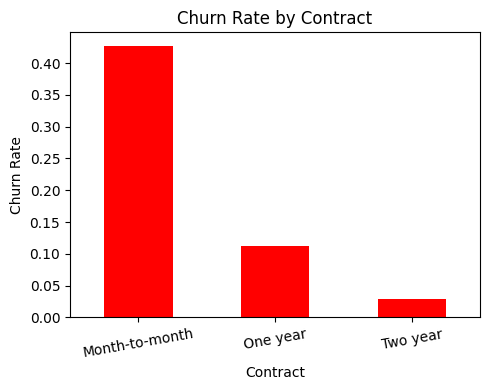

In [36]:
churn_by_contract = df.groupby('Contract')['Churn'].mean().sort_values(ascending=False)

churn_by_contract.plot(kind='bar', color='red', rot=10 ,figsize=(5,4))
plt.title("Churn Rate by Contract")
plt.ylabel("Churn Rate")
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, "churn_by_contract.png"))
plt.show()


In [37]:
print("TotalCharges" in df.columns)
print(df['TotalCharges'].isnull().sum())
print(df['TotalCharges'].describe())


True
0
count     7043
unique    6531
top       20.2
freq        11
Name: TotalCharges, dtype: object


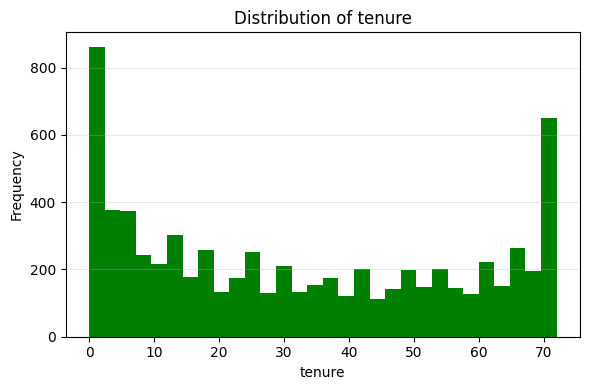

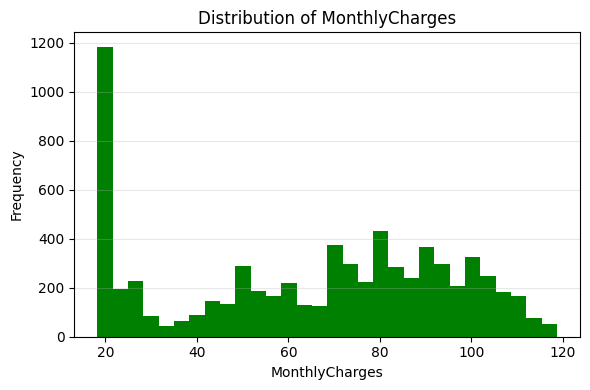

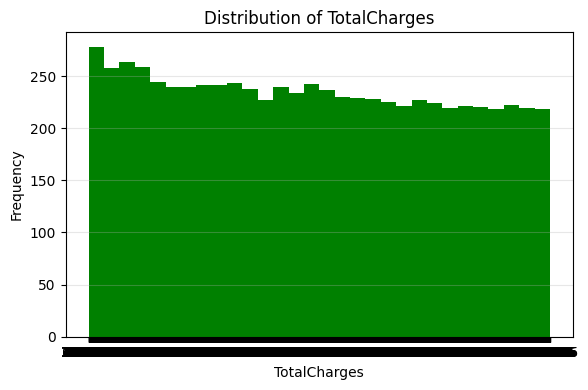

In [44]:

for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        plt.hist(df[col].dropna(), bins=30, color='Green')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.savefig(os.path.join(plots_dir, f'dist_{col}.png'))
        plt.show()





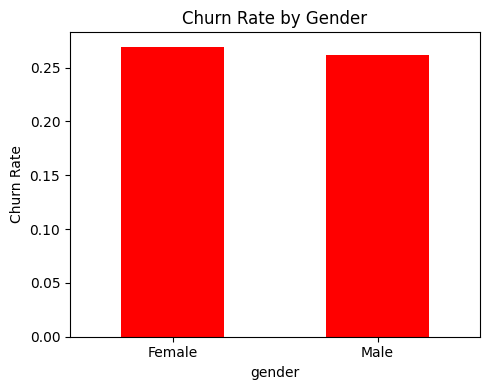

In [39]:
churn_by_gender = df.groupby('gender')['Churn'].mean().sort_values(ascending=False)

churn_by_gender.plot(kind='bar', color='red', rot=0,figsize=(5,4))
plt.title("Churn Rate by Gender")
plt.ylabel("Churn Rate")
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, "churn_by_gender.png"))
plt.show()


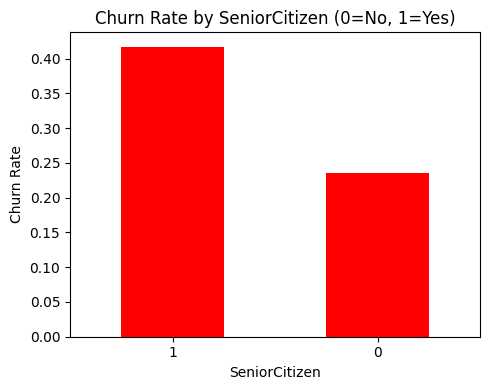

In [40]:
churn_by_senior = df.groupby('SeniorCitizen')['Churn'].mean().sort_values(ascending=False)

churn_by_senior.plot(kind='bar', color='red', rot=0,figsize=(5,4))
plt.title("Churn Rate by SeniorCitizen (0=No, 1=Yes)")
plt.ylabel("Churn Rate")
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, "churn_by_senior.png"))
plt.show()


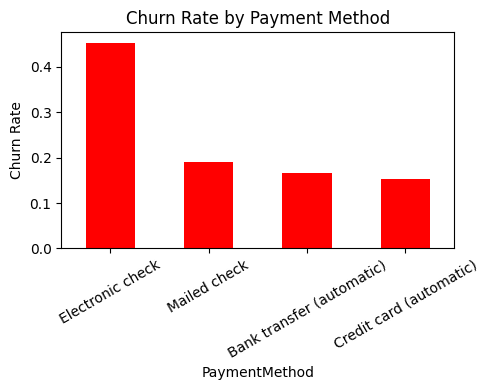

In [41]:
churn_by_payment = df.groupby('PaymentMethod')['Churn'].mean().sort_values(ascending=False)

churn_by_payment.plot(kind='bar', color='red', rot=30,figsize=(5,4))
plt.title("Churn Rate by Payment Method")
plt.ylabel("Churn Rate")
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, "churn_by_payment.png"))
plt.show()


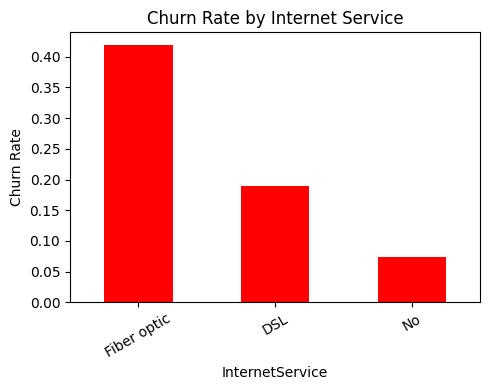

In [42]:
churn_by_internet = df.groupby('InternetService')['Churn'].mean().sort_values(ascending=False)

churn_by_internet.plot(kind='bar', color='red', rot=30,figsize=(5,4))
plt.title("Churn Rate by Internet Service")
plt.ylabel("Churn Rate")
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, "churn_by_internet.png"))
plt.show()
